In [125]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
%matplotlib inline

In [530]:
arabica_subset = pd.read_csv('arabica_temp_subset.csv').drop(['Unnamed: 0'], axis=1)

In [359]:
arabica_subset.head()

,quality_score,Country of Origin,Aroma,Flavor,Aftertaste,Acidity,Processing Method,Body,Balance,Uniformity,Clean Cup,Sweetness,Cupper Points,Moisture,Category One Defects,Category Two Defects,Temperature (F)
0,88.83,Brazil,8.58,8.42,8.42,8.50,Natural / Dry,8.25,8.33,10.0,10.0,10.0,8.33,0.11,0,1,77.908733
1,86.92,Brazil,8.50,8.50,8.00,8.00,Natural / Dry,8.00,8.00,10.0,10.0,10.0,7.92,0.12,0,2,77.908733
2,86.42,Brazil,8.50,8.17,8.00,7.75,Natural / Dry,8.00,8.00,10.0,10.0,10.0,8.00,0.12,0,2,77.908733
3,86.17,Brazil,8.17,7.92,7.92,7.75,NaN,8.33,8.00,10.0,10.0,10.0,8.08,0.08,0,2,77.908733
4,86.17,Brazil,8.42,7.92,8.00,7.75,NaN,7.92,8.00,10.0,10.0,10.0,8.17,0.01,0,3,77.908733


In [360]:
arabica_subset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1312 entries, 0 to 1311
Data columns (total 17 columns):
quality_score           1312 non-null float64
Country of Origin       1312 non-null object
Aroma                   1312 non-null float64
Flavor                  1312 non-null float64
Aftertaste              1312 non-null float64
Acidity                 1312 non-null float64
Processing Method       1159 non-null object
Body                    1312 non-null float64
Balance                 1312 non-null float64
Uniformity              1312 non-null float64
Clean Cup               1312 non-null float64
Sweetness               1312 non-null float64
Cupper Points           1312 non-null float64
Moisture                1312 non-null float64
Category One Defects    1312 non-null int64
Category Two Defects    1312 non-null int64
Temperature (F)         1312 non-null float64
dtypes: float64(13), int64(2), object(2)
memory usage: 174.3+ KB


In [361]:
# look at the values for outliers
arabica_subset.describe()

,quality_score,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean Cup,Sweetness,Cupper Points,Moisture,Category One Defects,Category Two Defects,Temperature (F)
count,1312.000000,1312.000000,1312.000000,1312.000000,1312.000000,1312.000000,1312.000000,1312.000000,1312.000000,1312.000000,1312.000000,1312.000000,1312.000000,1312.000000,1312.000000
mean,82.086212,7.562614,7.516913,7.396822,7.532614,7.516570,7.516349,9.825899,9.825625,9.895724,7.496723,0.088796,0.426067,3.589177,73.926821
std,3.675542,0.380976,0.402017,0.406202,0.381879,0.361512,0.408316,0.621552,0.817449,0.596925,0.476228,0.048001,1.831754,5.349249,5.120203
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,44.670797
25%,81.170000,7.420000,7.330000,7.250000,7.330000,7.330000,7.330000,10.000000,10.000000,10.000000,7.250000,0.090000,0.000000,0.000000,70.134484
50%,82.500000,7.580000,7.580000,7.420000,7.500000,7.500000,7.500000,10.000000,10.000000,10.000000,7.500000,0.110000,0.000000,2.000000,75.077908
75%,83.670000,7.750000,7.750000,7.580000,7.750000,7.670000,7.750000,10.000000,10.000000,10.000000,7.750000,0.120000,0.000000,4.000000,76.521828
max,90.580000,8.750000,8.830000,8.670000,8.750000,8.580000,8.750000,10.000000,10.000000,10.000000,10.000000,0.280000,31.000000,55.000000,80.083293


In [531]:
# sort values to find outlier
arabica_subset = arabica_subset.sort_values('quality_score').reset_index(drop=True)

In [532]:
# drop outlier
arabica_subset = arabica_subset.drop([0], axis=0)

In [533]:
# check outlier has been dropped
arabica_subset.describe()

,quality_score,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean Cup,Sweetness,Cupper Points,Moisture,Category One Defects,Category Two Defects,Temperature (F)
count,1311.000000,1311.000000,1311.000000,1311.000000,1311.000000,1311.000000,1311.000000,1311.000000,1311.00000,1311.000000,1311.000000,1311.000000,1311.000000,1311.000000,1311.000000
mean,82.148825,7.568383,7.522647,7.402464,7.538360,7.522304,7.522082,9.833394,9.83312,9.903272,7.502441,0.088772,0.426392,3.590389,73.925831
std,2.893505,0.318687,0.344348,0.351181,0.320307,0.296022,0.351696,0.559343,0.77135,0.530832,0.428989,0.048012,1.832415,5.351110,5.122031
min,43.130000,5.080000,6.000000,6.170000,5.250000,5.250000,6.000000,0.000000,0.00000,0.000000,5.170000,0.000000,0.000000,0.000000,44.670797
25%,81.170000,7.420000,7.330000,7.250000,7.330000,7.330000,7.330000,10.000000,10.00000,10.000000,7.250000,0.090000,0.000000,0.000000,70.134484
50%,82.500000,7.580000,7.580000,7.420000,7.500000,7.500000,7.500000,10.000000,10.00000,10.000000,7.500000,0.110000,0.000000,2.000000,75.077908
75%,83.670000,7.750000,7.750000,7.580000,7.750000,7.670000,7.750000,10.000000,10.00000,10.000000,7.750000,0.120000,0.000000,4.000000,76.521828
max,90.580000,8.750000,8.830000,8.670000,8.750000,8.580000,8.750000,10.000000,10.00000,10.000000,10.000000,0.280000,31.000000,55.000000,80.083293


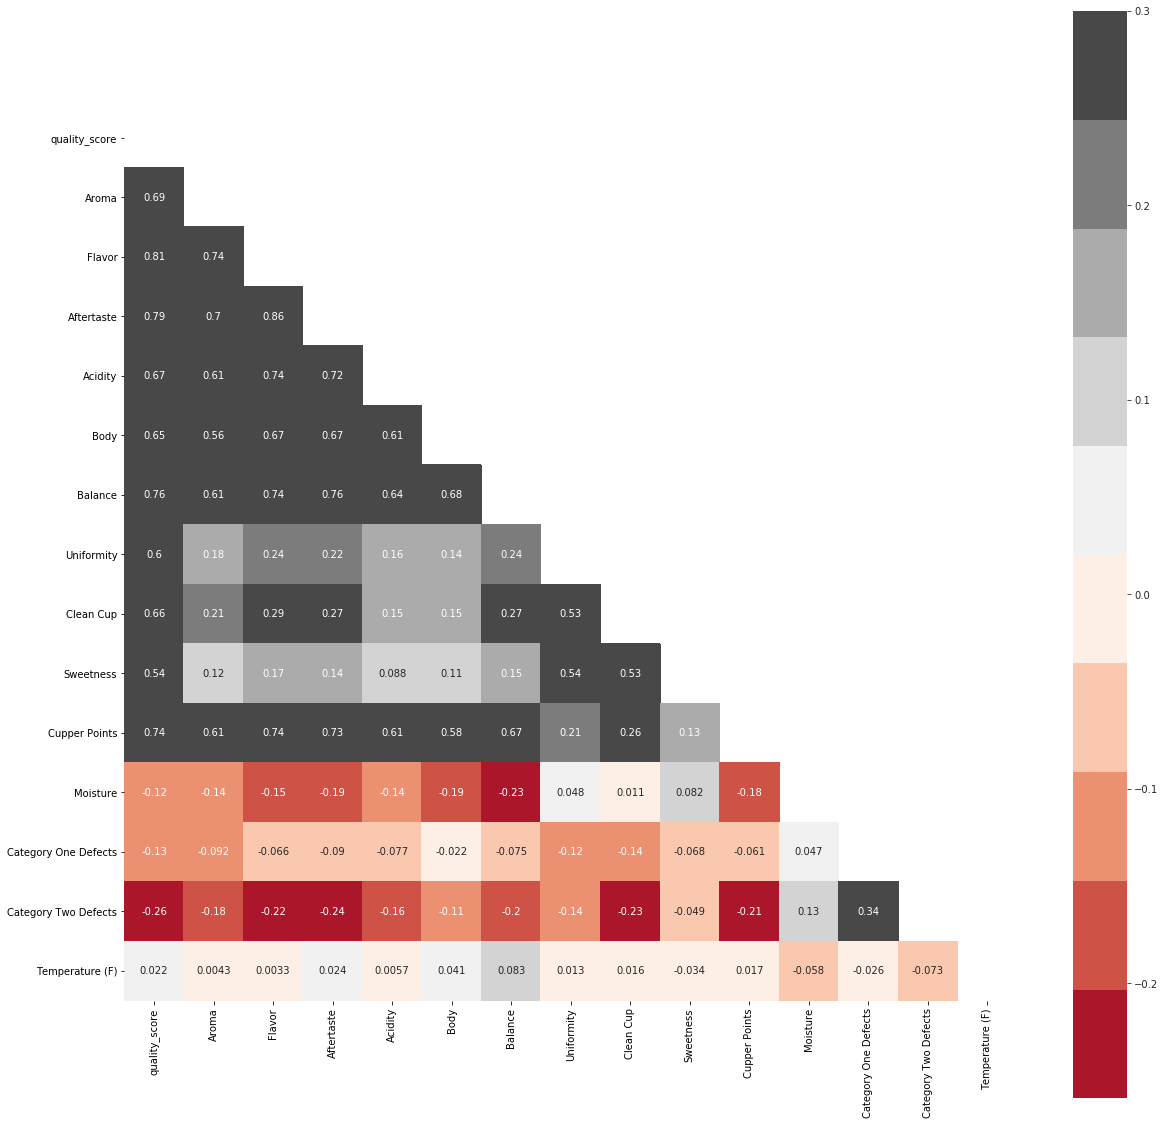

In [534]:
# graph correlation matrix to see what pairs are correlated and how much they are correlated
plt.subplots(figsize=(20, 20))
cmap = sns.color_palette("RdGy", 10)
mask = np.zeros_like(arabica_subset.corr())
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(arabica_subset.corr(), mask=mask, cmap=cmap, vmax=0.3, square=True, annot=True)
plt.show()

In [535]:
# looking at correlations of pairs with numbers - same as map above
arabica_subset.corr()

,quality_score,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean Cup,Sweetness,Cupper Points,Moisture,Category One Defects,Category Two Defects,Temperature (F)
quality_score,1.000000,0.687318,0.811363,0.791112,0.670875,0.647330,0.755342,0.599636,0.658568,0.537811,0.735323,-0.118782,-0.132447,-0.259041,0.021893
Aroma,0.687318,1.000000,0.744639,0.695940,0.607357,0.562627,0.612913,0.182008,0.214618,0.121017,0.607730,-0.138825,-0.092361,-0.177176,0.004252
Flavor,0.811363,0.744639,1.000000,0.859340,0.744854,0.667394,0.735087,0.240988,0.290256,0.171802,0.744596,-0.151475,-0.065993,-0.223459,0.003267
Aftertaste,0.791112,0.695940,0.859340,1.000000,0.715676,0.669066,0.764179,0.221930,0.271840,0.142018,0.732982,-0.190972,-0.089534,-0.243015,0.024350
Acidity,0.670875,0.607357,0.744854,0.715676,1.000000,0.610868,0.644450,0.156401,0.147742,0.088337,0.614556,-0.136065,-0.076609,-0.162978,0.005744
Body,0.647330,0.562627,0.667394,0.669066,0.610868,1.000000,0.678350,0.139023,0.150719,0.107856,0.575619,-0.190209,-0.022373,-0.113244,0.041022
Balance,0.755342,0.612913,0.735087,0.764179,0.644450,0.678350,1.000000,0.238418,0.266347,0.153149,0.673925,-0.226855,-0.075257,-0.202311,0.082867
Uniformity,0.599636,0.182008,0.240988,0.221930,0.156401,0.139023,0.238418,1.000000,0.525415,0.537956,0.208979,0.048052,-0.117382,-0.139322,0.012808
Clean Cup,0.658568,0.214618,0.290256,0.271840,0.147742,0.150719,0.266347,0.525415,1.000000,0.525851,0.258905,0.010707,-0.139460,-0.228000,0.016161
Sweetness,0.537811,0.121017,0.171802,0.142018,0.088337,0.107856,0.153149,0.537956,0.525851,1.000000,0.132817,0.081902,-0.068056,-0.049236,-0.034409


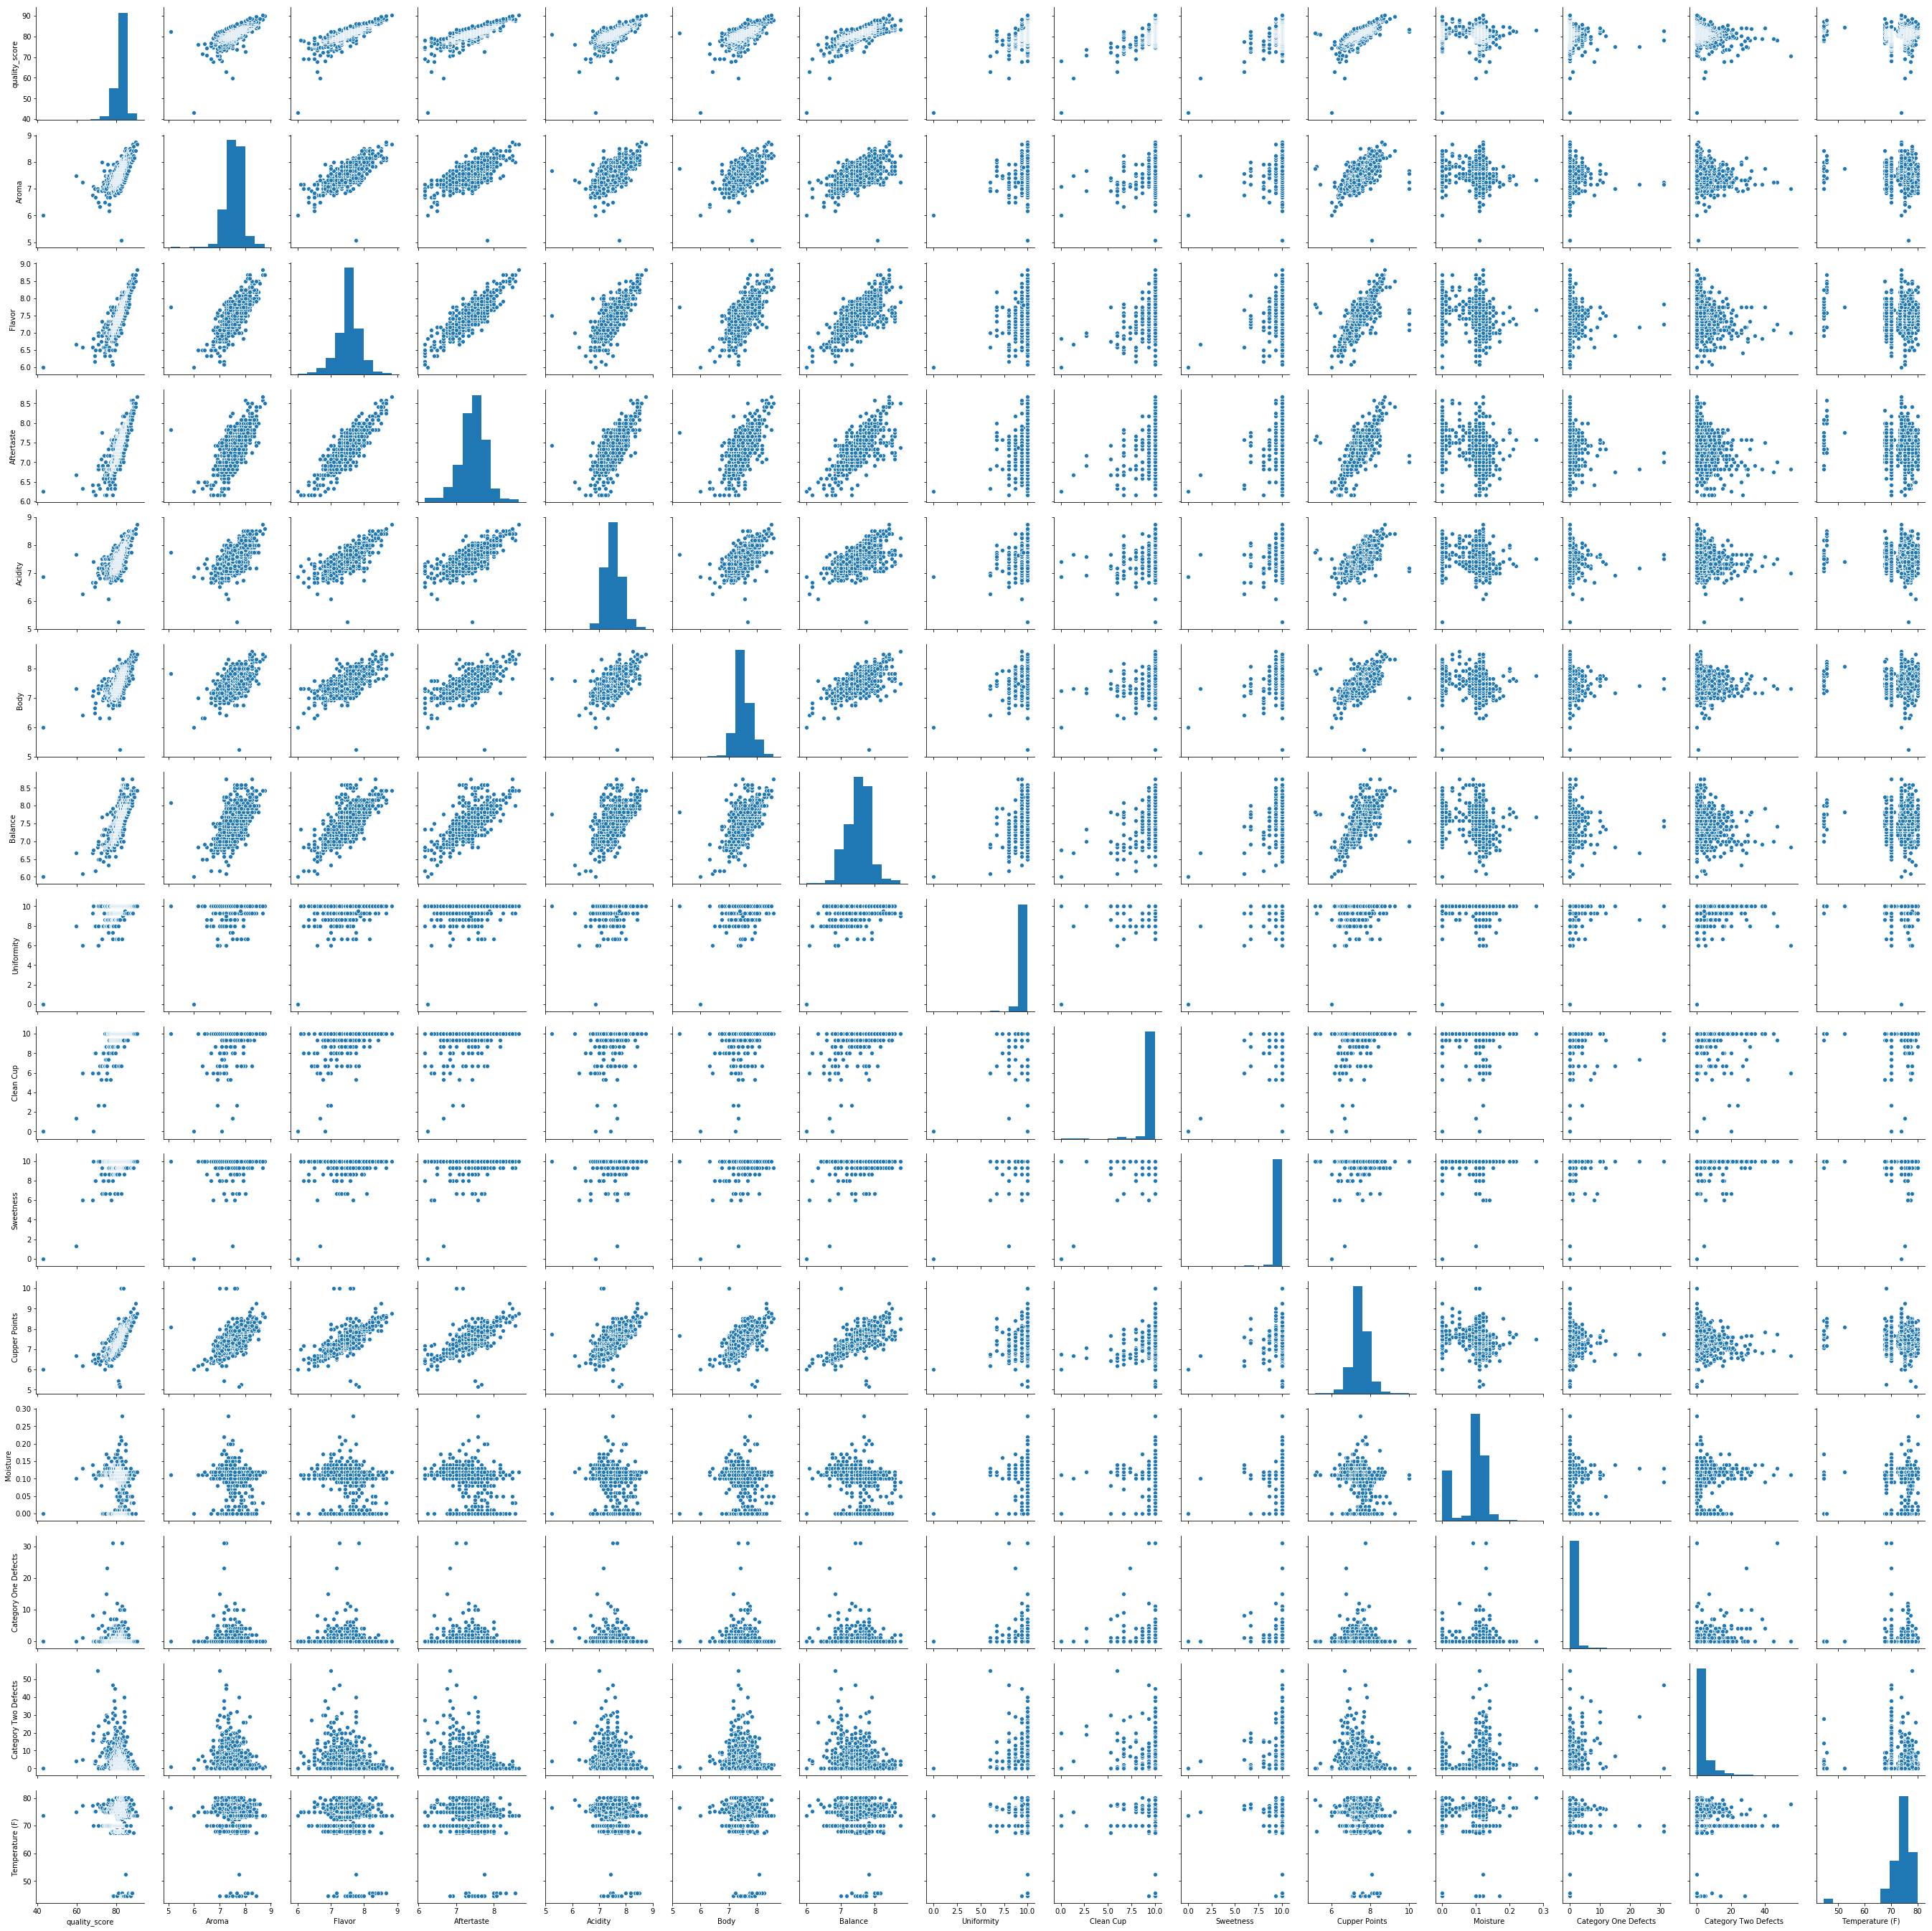

In [366]:
# looking at the relationship between pairs
sns.pairplot(arabica_subset)

## Value Counts For Each Column in the DataFrame

In [536]:
arabica_subset.columns

Index(['quality_score', 'Country of Origin', 'Aroma', 'Flavor', 'Aftertaste',
       'Acidity', 'Processing Method', 'Body', 'Balance', 'Uniformity',
       'Clean Cup', 'Sweetness', 'Cupper Points', 'Moisture',
       'Category One Defects', 'Category Two Defects', 'Temperature (F)'],
      dtype='object')

In [537]:
arabica_subset['quality_score'].value_counts()

83.17    38
83.00    37
82.42    31
82.75    29
82.33    29
82.92    26
81.83    26
82.67    26
81.67    25
83.25    24
81.50    24
83.50    24
82.25    22
84.17    21
82.17    21
83.83    21
83.67    21
82.50    21
82.00    21
83.42    20
82.58    20
83.33    20
82.83    19
84.67    19
84.25    19
83.75    19
81.92    18
83.08    18
84.00    18
82.08    17
         ..
89.75     1
88.67     1
75.83     1
75.67     1
87.33     1
87.58     1
86.42     1
43.13     1
70.67     1
72.83     1
88.25     1
59.83     1
78.83     1
86.83     1
84.13     1
72.33     1
83.38     1
63.08     1
88.75     1
76.83     1
72.58     1
72.92     1
86.67     1
74.83     1
90.58     1
71.00     1
75.50     1
77.00     1
86.50     1
70.75     1
Name: quality_score, Length: 178, dtype: int64

In [477]:
arabica_subset['Country of Origin'].value_counts()

Mexico                         236
Colombia                       183
Guatemala                      181
Brazil                         132
Taiwan                          75
United States (Hawaii)          73
Honduras                        52
Costa Rica                      51
Ethiopia                        45
Tanzania                        40
Thailand                        32
Uganda                          26
Nicaragua                       26
Kenya                           25
El Salvador                     21
Indonesia                       20
China                           16
Malawi                          11
Peru                            10
Myanmar                          8
United States                    8
Vietnam                          7
Haiti                            6
Philippines                      5
United States (Puerto Rico)      4
Panama                           4
Laos                             3
Burundi                          2
Cote d'Ivoire       

In [538]:
# rename United States (Hawaii) to Hawaii
arabica_subset.loc[arabica_subset['Country of Origin']=='United States (Hawaii)', 'Country of Origin'] = 'Hawaii'

In [539]:
# rename United States (Puerto Rico) to Puerto Rico
arabica_subset.loc[arabica_subset['Country of Origin']=='United States (Puerto Rico)', 'Country of Origin'] = 'Puerto_Rico'

In [540]:
# rename Cote d'Ivoire to Cote_dIvoire
arabica_subset.loc[arabica_subset['Country of Origin']=="Cote d'Ivoire", 'Country of Origin'] = 'Cote_dIvoire'

In [541]:
# replace whitespace with underscores
arabica_subset['Country of Origin'] = arabica_subset['Country of Origin'].str.replace(' ', '_')

In [542]:
arabica_subset['Country of Origin'].value_counts()

Mexico              236
Colombia            183
Guatemala           181
Brazil              132
Taiwan               75
Hawaii               73
Honduras             52
Costa_Rica           51
Ethiopia             45
Tanzania             40
Thailand             32
Uganda               26
Nicaragua            26
Kenya                25
El_Salvador          21
Indonesia            20
China                16
Malawi               11
Peru                 10
United_States         8
Myanmar               8
Vietnam               7
Haiti                 6
Philippines           5
Panama                4
Puerto_Rico           4
Laos                  3
Burundi               2
India                 1
Japan                 1
Columbia              1
Rwanda                1
Mauritius             1
Cote_dIvoire          1
Papua_New_Guinea      1
Ecuador               1
Zambia                1
Name: Country of Origin, dtype: int64

In [543]:
arabica_subset['Aroma'].value_counts()

7.67    173
7.50    163
7.58    149
7.75    122
7.42    121
7.83    101
7.33     96
7.25     78
7.92     57
7.17     45
8.00     43
7.08     28
7.00     23
8.08     20
8.17     20
6.92     14
6.83      9
8.25      9
8.42      9
8.33      6
6.75      6
6.67      3
8.50      3
7.81      2
6.50      2
8.67      2
6.17      1
6.42      1
8.75      1
5.08      1
8.58      1
6.33      1
6.00      1
Name: Aroma, dtype: int64

In [589]:
# convert Flavor values to string and strip whitespace
arabica_subset['Flavor'] = arabica_subset['Flavor'].astype(str).str.strip(' ')

In [590]:
arabica_subset['Flavor'].value_counts()

7.5     164
7.58    162
7.67    145
7.75    120
7.42    114
7.33    110
7.83     85
7.25     64
7.17     56
7.92     42
7.08     42
8.0      41
7.0      36
8.17     18
6.83     16
6.92     15
8.08     13
6.75     10
6.5       9
8.25      7
8.5       5
8.33      5
6.58      5
8.42      5
6.67      4
8.67      4
6.33      3
8.58      2
6.17      2
7.88      2
7.81      1
8.83      1
6.08      1
6.42      1
6.0       1
Name: Flavor, dtype: int64

In [387]:
arabica_subset['Aftertaste'].value_counts()

7.50    162
7.33    150
7.42    127
7.58    125
7.25    103
7.67     99
7.17     90
7.75     81
7.00     62
7.83     61
7.08     45
6.83     36
6.92     36
8.00     27
7.92     19
6.67     14
6.75      9
6.17      8
8.08      7
8.17      7
6.33      6
6.58      6
6.50      6
8.50      4
6.42      4
8.25      4
8.42      3
8.33      2
6.25      2
8.58      2
7.56      1
7.88      1
7.38      1
8.67      1
Name: Aftertaste, dtype: int64

In [388]:
arabica_subset['Acidity'].value_counts()

7.50    160
7.58    150
7.67    143
7.42    127
7.75    122
7.33    110
7.25     86
7.17     73
7.83     72
8.00     47
7.92     46
7.08     36
7.00     32
8.08     25
8.17     14
6.83     11
6.92     10
8.33      9
8.50      7
6.75      6
8.25      6
8.42      6
6.67      5
5.25      1
7.63      1
8.75      1
6.08      1
8.58      1
6.88      1
6.50      1
6.25      1
Name: Acidity, dtype: int64

In [389]:
arabica_subset['Processing Method'].value_counts()

Washed / Wet                 812
Natural / Dry                251
Semi-washed / Semi-pulped     56
Other                         26
Pulped natural / honey        14
Name: Processing Method, dtype: int64

In [544]:
# clean each value
arabica_subset['Processing Method'] = arabica_subset['Processing Method'].str.replace(' / ', '_')

In [545]:
# see how many NaN values are in the column
arabica_subset['Processing Method'].isnull().value_counts()

False    1159
True      152
Name: Processing Method, dtype: int64

In [546]:
# fill NaN values with Other since they are unknown
arabica_subset['Processing Method'] = arabica_subset['Processing Method'].fillna('Other')

In [547]:
# review value counts again - notice the change from 26 to 178 after the converted NaN values were added
arabica_subset['Processing Method'].value_counts()

Washed_Wet                 812
Natural_Dry                251
Other                      178
Semi-washed_Semi-pulped     56
Pulped natural_honey        14
Name: Processing Method, dtype: int64

In [394]:
arabica_subset['Body'].value_counts()

7.50    198
7.67    149
7.58    136
7.33    131
7.42    125
7.75    108
7.25     86
7.83     82
7.17     68
7.92     48
7.08     37
7.00     34
8.00     34
8.08     21
6.92     11
8.17      7
8.33      6
8.25      5
6.83      4
6.75      4
8.50      3
8.42      3
6.33      2
6.67      2
5.25      1
6.42      1
7.63      1
8.58      1
7.38      1
6.50      1
6.00      1
Name: Body, dtype: int64

In [187]:
arabica_subset['Balance'].value_counts()

7.50    172
7.67    145
7.58    127
7.42    120
7.75    103
7.33     99
7.83     98
7.17     71
7.25     64
7.00     46
8.00     45
7.08     41
7.92     38
6.92     26
6.83     22
8.17     17
8.08     16
8.25      8
8.50      7
6.75      7
8.58      7
8.33      7
8.42      7
6.67      4
6.58      3
6.17      3
8.75      2
6.50      2
6.08      1
6.33      1
6.42      1
6.00      1
Name: Balance, dtype: int64

In [188]:
arabica_subset['Uniformity'].value_counts()

10.00    1128
9.33      112
8.67       31
8.00       25
6.67        7
6.00        3
7.33        2
9.50        1
9.00        1
0.00        1
Name: Uniformity, dtype: int64

In [189]:
arabica_subset['Clean Cup'].value_counts()

10.00    1194
9.33       58
8.67       16
6.67       13
8.00       13
6.00        6
7.33        3
5.33        3
2.67        2
0.00        2
1.33        1
Name: Clean Cup, dtype: int64

In [190]:
arabica_subset['Sweetness'].value_counts()

10.00    1218
9.33       61
8.67       12
8.00        8
6.67        7
6.00        3
1.33        1
0.00        1
Name: Sweetness, dtype: int64

In [191]:
arabica_subset['Cupper Points'].value_counts()

7.50     152
7.58     136
7.33     114
7.67     113
7.42     103
7.25      85
7.75      84
7.83      81
7.17      63
7.92      52
8.00      51
7.00      50
7.08      38
8.08      23
6.83      21
6.67      20
8.17      20
6.92      18
6.75      14
8.33       8
8.50       8
6.50       6
8.42       6
6.58       6
8.25       6
6.42       5
8.58       5
10.00      4
6.33       3
6.17       3
8.67       2
6.00       2
9.00       1
5.25       1
9.25       1
8.75       1
5.42       1
5.17       1
6.25       1
8.83       1
8.13       1
Name: Cupper Points, dtype: int64

In [192]:
arabica_subset['Moisture'].value_counts()

0.11    381
0.12    283
0.00    253
0.10    180
0.13     75
0.09     26
0.14     23
0.08     16
0.01     15
0.05      8
0.15      8
0.02      7
0.06      7
0.07      5
0.16      5
0.03      4
0.04      4
0.20      3
0.17      3
0.18      2
0.22      1
0.21      1
0.28      1
Name: Moisture, dtype: int64

In [193]:
arabica_subset['Category One Defects'].value_counts()

0     1111
1      101
2       38
3       18
4       16
5        9
10       4
7        3
6        3
31       2
23       1
15       1
12       1
11       1
9        1
8        1
Name: Category One Defects, dtype: int64

In [194]:
arabica_subset['Category Two Defects'].value_counts()

0     363
1     200
2     177
3     133
4     118
5      73
6      42
7      39
8      29
9      22
10     21
12     13
13      9
14      9
11      8
20      8
17      7
16      6
15      6
26      3
19      3
18      2
21      2
23      2
29      2
30      2
47      1
22      1
24      1
27      1
28      1
31      1
32      1
34      1
38      1
40      1
45      1
55      1
Name: Category Two Defects, dtype: int64

In [195]:
arabica_subset['Temperature (F)'].value_counts()    #same as Country of Origin

70.134484    236
76.521828    184
75.077908    181
77.908733    132
68.022474     76
76.100000     73
75.225220     52
76.858546     51
73.675486     45
73.229066     40
80.080174     32
77.420121     26
74.310667     26
77.213459     25
75.869594     21
79.269161     20
44.670797     16
72.479624     11
67.559201     10
73.847997      8
45.710599      8
76.279672      7
77.244936      6
78.642956      5
78.025105      4
70.000000      4
74.967157      3
69.584427      2
77.381813      1
72.413266      1
71.076460      1
80.083293      1
76.215093      1
52.409835      1
73.881803      1
Name: Temperature (F), dtype: int64

## Dummy Variables

In [548]:
# turn a categorical column into multiple dummy columns
Aroma_dummy = pd.get_dummies(arabica_subset['Aroma'],prefix = 'Aroma')

In [549]:
# adding the dummy dataframe to main dataframe
arabica_aroma_dummies = pd.concat([arabica_subset, Aroma_dummy], axis = 1)

In [591]:
Flavor_dummy = pd.get_dummies(arabica_subset['Flavor'], prefix='Flavor')

In [592]:
arabica_flavor_dummies = pd.concat([arabica_aroma_dummies, Flavor_dummy], axis = 1)

In [593]:
Aftertaste_dummy = pd.get_dummies(arabica_subset['Aftertaste'], prefix='Aftertaste')

In [594]:
arabica_taste_dummies = pd.concat([arabica_flavor_dummies, Aftertaste_dummy], axis = 1)

In [595]:
Acidity_dummy = pd.get_dummies(arabica_subset['Acidity'], prefix='Acidity')

In [596]:
arabica_acidity_dummies = pd.concat([arabica_taste_dummies, Acidity_dummy], axis = 1)

In [597]:
Body_dummy = pd.get_dummies(arabica_subset['Body'], prefix='Body')

In [598]:
arabica_body_dummies = pd.concat([arabica_acidity_dummies, Body_dummy], axis = 1)

In [599]:
Balance_dummy = pd.get_dummies(arabica_subset['Balance'], prefix='Balance')

In [600]:
arabica_balance_dummies = pd.concat([arabica_body_dummies, Balance_dummy], axis = 1)

In [601]:
Uniformity_dummy = pd.get_dummies(arabica_subset['Uniformity'], prefix='Uniformity')

In [602]:
arabica_uniformity_dummies = pd.concat([arabica_balance_dummies, Uniformity_dummy], axis = 1)

In [603]:
CleanCup_dummy = pd.get_dummies(arabica_subset['Clean Cup'], prefix='Clean_Cup')

In [604]:
arabica_cleancup_dummies = pd.concat([arabica_uniformity_dummies, CleanCup_dummy], axis = 1)

In [605]:
Sweetness_dummy = pd.get_dummies(arabica_subset['Sweetness'], prefix='Sweetness')

In [606]:
arabica_sweetness_dummies = pd.concat([arabica_cleancup_dummies, Sweetness_dummy], axis = 1)

In [607]:
CupperPts_dummy = pd.get_dummies(arabica_subset['Cupper Points'], prefix='Cupper_Points')

In [608]:
arabica_cupperpts_dummies = pd.concat([arabica_sweetness_dummies, CupperPts_dummy], axis = 1)

In [609]:
Moisture_dummy = pd.get_dummies(arabica_subset['Moisture'], prefix='Moisture')

In [610]:
arabica_moisture_dummies = pd.concat([arabica_cupperpts_dummies, Moisture_dummy], axis = 1)

In [611]:
defects1_dummy = pd.get_dummies(arabica_subset['Category One Defects'], prefix='Category_One_Defects')

In [612]:
arabica_defects1_dummies = pd.concat([arabica_moisture_dummies, defects1_dummy], axis = 1)

In [613]:
defects2_dummy = pd.get_dummies(arabica_subset['Category Two Defects'], prefix='Category_Two_Defects')

In [614]:
arabica_defects2_dummies = pd.concat([arabica_defects1_dummies, defects2_dummy], axis = 1)

In [615]:
country_dummy = pd.get_dummies(arabica_subset['Country of Origin'], prefix='Country')

In [616]:
arabica_country_dummies = pd.concat([arabica_defects2_dummies, country_dummy], axis = 1)

In [617]:
processing_dummy = pd.get_dummies(arabica_subset['Processing Method'], prefix='Processing')

In [618]:
arabica_processing_dummies = pd.concat([arabica_country_dummies, processing_dummy], axis = 1)

## Creating a Model

### Before Creating Dummy Variables

In [295]:
# set up the formula
f = "quality_score~Aroma+Flavor+Aftertaste+Acidity+Body+Balance+Uniformity"

In [296]:
# set up the model using StatsModel
model = ols(formula=f, data=arabica_subset).fit()

In [297]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          quality_score   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     1582.
Date:                Thu, 18 Apr 2019   Prob (F-statistic):               0.00
Time:                        11:27:17   Log-Likelihood:                -1777.1
No. Observations:                1311   AIC:                             3570.
Df Residuals:                    1303   BIC:                             3612.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.3379      0.825      6.468      0.000       3.719       6.957
Aroma          1.0525      0.125      8.417      0.000       0.807       1.298
Flavor         2.0140      0.173     11.674      0.000       1.676       2.352
Aftertaste     1.3986      0.160      8.724      0.000       1.084       1.713
Acidity        0.6098      0.128      4.767      0.000       0.359       0.861
Body           0.8994      0.130      6.916      0.000       0.644       1.155
Balance        1.4206      0.126     11.309      0.000       1.174       1.667
Uniformity     2.1654      0.048     44.835      0.000       2.071       2.260
==============================================================================
Omnibus:                     1448.313   Durbin-Watson:                   1.284
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           214403.515
Skew:                          -5.168   Prob(JB):                         0.00
Kurtosis:                      64.791   Cond. No.                         666.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### After Creating Dummy Variables

In [619]:
arabica_processing_dummies.columns

Index(['quality_score', 'Country of Origin', 'Aroma', 'Flavor', 'Aftertaste',
       'Acidity', 'Processing Method', 'Body', 'Balance', 'Uniformity',
       ...
       'Country_Thailand', 'Country_Uganda', 'Country_United_States',
       'Country_Vietnam', 'Country_Zambia', 'Processing_Natural_Dry',
       'Processing_Other', 'Processing_Pulped natural_honey',
       'Processing_Semi-washed_Semi-pulped', 'Processing_Washed_Wet'],
      dtype='object', length=402)

In [620]:
columns = arabica_processing_dummies.drop(['quality_score','Country of Origin', 'Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Processing Method', 'Body', 'Balance', 'Uniformity', 'Clean Cup', 'Sweetness', 'Cupper Points', 'Moisture', 'Category One Defects', 'Category Two Defects', 'Temperature (F)', 'Aroma_5.08', 'Flavor_6.0', 'Aftertaste_6.17', 'Acidity_5.25', 'Body_5.25', 'Balance_6.0', 'Uniformity_0.0', 'Cupper_Points_5.17', 'Moisture_0.0', 'Category_One_Defects_31', 'Category_Two_Defects_55', 'Country_Puerto_Rico', 'Processing_Other'], axis=1).columns.tolist()

In [621]:
ind_var = '+'.join(columns).strip(' ')

In [622]:
ind_var

'Aroma_6.0+Aroma_6.17+Aroma_6.33+Aroma_6.42+Aroma_6.5+Aroma_6.67+Aroma_6.75+Aroma_6.83+Aroma_6.92+Aroma_7.0+Aroma_7.08+Aroma_7.17+Aroma_7.25+Aroma_7.33+Aroma_7.42+Aroma_7.5+Aroma_7.58+Aroma_7.67+Aroma_7.75+Aroma_7.81+Aroma_7.83+Aroma_7.92+Aroma_8.0+Aroma_8.08+Aroma_8.17+Aroma_8.25+Aroma_8.33+Aroma_8.42+Aroma_8.5+Aroma_8.58+Aroma_8.67+Aroma_8.75+Flavor_6.08+Flavor_6.17+Flavor_6.33+Flavor_6.42+Flavor_6.5+Flavor_6.58+Flavor_6.67+Flavor_6.75+Flavor_6.83+Flavor_6.92+Flavor_7.0+Flavor_7.08+Flavor_7.17+Flavor_7.25+Flavor_7.33+Flavor_7.42+Flavor_7.5+Flavor_7.58+Flavor_7.67+Flavor_7.75+Flavor_7.81+Flavor_7.83+Flavor_7.88+Flavor_7.92+Flavor_8.0+Flavor_8.08+Flavor_8.17+Flavor_8.25+Flavor_8.33+Flavor_8.42+Flavor_8.5+Flavor_8.58+Flavor_8.67+Flavor_8.83+Aftertaste_6.25+Aftertaste_6.33+Aftertaste_6.42+Aftertaste_6.5+Aftertaste_6.58+Aftertaste_6.67+Aftertaste_6.75+Aftertaste_6.83+Aftertaste_6.92+Aftertaste_7.0+Aftertaste_7.08+Aftertaste_7.17+Aftertaste_7.25+Aftertaste_7.33+Aftertaste_7.38+Aftertaste_7

In [623]:
# set up the formula
form = "quality_score~{}".format(ind_var).strip(' ')

In [529]:
form

'quality_score~Aroma_6.0+Aroma_6.17+Aroma_6.33+Aroma_6.42+Aroma_6.5+Aroma_6.67+Aroma_6.75+Aroma_6.83+Aroma_6.92+Aroma_7.0+Aroma_7.08+Aroma_7.17+Aroma_7.25+Aroma_7.33+Aroma_7.42+Aroma_7.5+Aroma_7.58+Aroma_7.67+Aroma_7.75+Aroma_7.81+Aroma_7.83+Aroma_7.92+Aroma_8.0+Aroma_8.08+Aroma_8.17+Aroma_8.25+Aroma_8.33+Aroma_8.42+Aroma_8.5+Aroma_8.58+Aroma_8.67+Aroma_8.75+Flavor_6.08+Flavor_6.17+Flavor_6.33+Flavor_6.42+Flavor_6.5+Flavor_6.58+Flavor_6.67+Flavor_6.75+Flavor_6.83+Flavor_6.92+Flavor_7.0+Flavor_7.08+Flavor_7.17+Flavor_7.25+Flavor_7.33+Flavor_7.42+Flavor_7.5+Flavor_7.58+Flavor_7.67+Flavor_7.75+Flavor_7.81+Flavor_7.83+Flavor_7.88+Flavor_7.92+Flavor_8.0+Flavor_8.08+Flavor_8.17+Flavor_8.25+Flavor_8.33+Flavor_8.42+Flavor_8.5+Flavor_8.58+Flavor_8.67+Flavor_8.83+Aftertaste_6.25+Aftertaste_6.33+Aftertaste_6.42+Aftertaste_6.5+Aftertaste_6.58+Aftertaste_6.67+Aftertaste_6.75+Aftertaste_6.83+Aftertaste_6.92+Aftertaste_7.0+Aftertaste_7.08+Aftertaste_7.17+Aftertaste_7.25+Aftertaste_7.33+Aftertaste_7.3

In [624]:
# set up the model using StatsModel
arabica_model = ols(formula=form, data=arabica_processing_dummies).fit()

SyntaxError: invalid syntax (<unknown>, line 1)